# Inference and Analysis on the Relation Between Education/Sex and Salary

### STAT 201 Final Project - Group 8
##### Members: Aarav Mahajan, Ben Jia, Luke Joe, Xiaowei Zhao
***

## Contents:

- [Introduction](#Introduction)
- [Methods & Results](#Methods-&-Results)
    - [Preliminary Visualizations & Methods](#0---Preliminary-Visualizations-&-Methods)
    - [Inference on Education v.s. Salary](#1---Inference-on-Education-v.s.-Salary)
        - [Confidence Intervals](#Confidence-Intervals-for-the-True-Difference-in-Proportions---Education-v.s.-Salary)
            - [Conclusion](#Conclusion---Confidence-Intervals-on-Education-v.s.-Salary)
        - [Hypothesis Tests](#Hypothesis-Tests-for-the-Difference-in-Proportions---Education-v.s.-Salary)
            - [Conclusion](#Conclusion---Hypothesis-Tests-on-Education-v.s.-Salary)
    - [Inference on Sex v.s. Salary](#2---Inference-on-Sex-v.s.-Salary)
        - [Confidence Intervals](#Confidence-Intervals-for-the-True-Difference-in-Proportions---Sex-v.s.-Salary)
            - [Conclusion](#Conclusion---Confidence-Intervals-on-Sex-v.s.-Salary)
        - [Hypothesis Tests](#Hypothesis-Tests-for-the-Difference-in-Proportions---Sex-v.s.-Salary)
            - [Conclusion](#Conclusion---Hypothesis-Tests-on-Sex-v.s.-Salary)
- [Summary & Discussion](#Summary-&-Discussion)
- [References](#References)

***

## Introduction
It is well known around the world that those with higher education are typically paid more than those without. In 2018, workers in their 40s with a university degree are paid 53% more than those without higher education on average (Park et al., 2020). Though numbers like these are meaningful, it is important to note that this average may be skewed due to high outliers, causing an unfair representation of the salaries of most people with higher education. Additionally, suppose people are only concerned with meeting a minimum salary. In this case, perhaps we would be more interested in the proportion of adults that exceed a given salary threshold, sorted by varying levels of education. This way we can infer if there is a relationship between education and meeting the salary threshold of interest. Under the same logic, we are also interested in determining the proportion of adults that exceed the given salary threshold sorted by sex, in order to infer if there is a relationship between sex and salary. This leads to the following questions that we aim to answer through this project:

Q1: **Is the proportion of working adults with higher education (i.e. bachelors, doctorate) and a salary greater than \\$50,000 noticeably greater than the proportion of working adults without higher education (i.e. high school) and a salary greater than \\$50,000?**

and

Q2: **Is the proportion of working male adults with a salary greater than \\$50,000 noticeably greater than the proportion of working female with a salary greater than \\$50,000?**

To answer this question, we will make use of the “Adult” dataset, which is a dataset extracted by Barry Becker from the 1994 US Census, found on the UCI Machine Learning Repository. This dataset contains 48842 instances (rows) and 14 attributes (columns). Among the attributes, noteworthy categories include age, education, marital status, occupation, race, sex, work hours per week, and salary (either >50K or <=50K). In our project, we will be focusing on education and sex as explanatory variables, and salary as our response variable. 

***

## Methods & Results

### 0 - Preliminary Visualizations & Methods

Let us start our preliminary processing and findings. Before we start running any code, it is valuable to mention that any code cells without set.seed(1234) **DO NOT** contain any form of random generations, whereas those with set.seed(1234) contains random generation (likely for bootstrapping). The purpose of set.seed is to ensure that our findings are reproducable.

With that out of the way, let us load the necessary libraries and read in the dataset (with column names):

In [1]:
# Run this cell before continuing.
library(infer)
library(repr)
library(tidyverse)
library(broom)

adult <- read_csv("https://raw.githubusercontent.com/Ehsian/STAT201-Group-Project/main/adult.csv")
head(adult)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


As mentioned in the introduction, we will be focusing on education, sex and salary, so we select only those three columns:

In [2]:
adult_selected <- adult |>
    select(education, sex, salary)
head(adult_selected)

education,sex,salary
<chr>,<chr>,<chr>
Bachelors,Male,<=50K
Bachelors,Male,<=50K
HS-grad,Male,<=50K
11th,Male,<=50K
Bachelors,Female,<=50K
Masters,Female,<=50K


After selecting the important columns, we can see that the `education` column is not very ideal for grouping, as there are too many different categories to group by. Recall that our goal in this project is to find the distinction between those with "higher level education" and those without. Thus, we would want to group by these two values. Let us change the `education` column to reflect this.

Note that we know the categories within `education` are the following: {Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.}

For our purposes, any form of education after high school counts as `higher_level`, and all other categories will fall under `not_higher_level`.

In [3]:
new_edu_values <- function(value) {
    if (value == "Bachelors" | value == "Some-college" | value == "Prof-school" | value == "Assoc-acdm" | value == "Assoc-voc" | value == "Masters" | value == "Doctorate") {
        "higher_level" # Return "higher_level" if the given value is any of the above
    } else {
        "not_higher_level" # Otherwise, return "not_higher_level"
    }
}

adult_tidy <- adult_selected |>
    mutate(education = apply(adult_selected["education"], 1, new_edu_values))

head(adult_tidy)

education,sex,salary
<chr>,<chr>,<chr>
higher_level,Male,<=50K
higher_level,Male,<=50K
not_higher_level,Male,<=50K
not_higher_level,Male,<=50K
higher_level,Female,<=50K
higher_level,Female,<=50K


Now that the data is in the form we want it, let's plot the distributions! We will use a bar plot, color separated to visualize the proportions which we will calculate soon after.

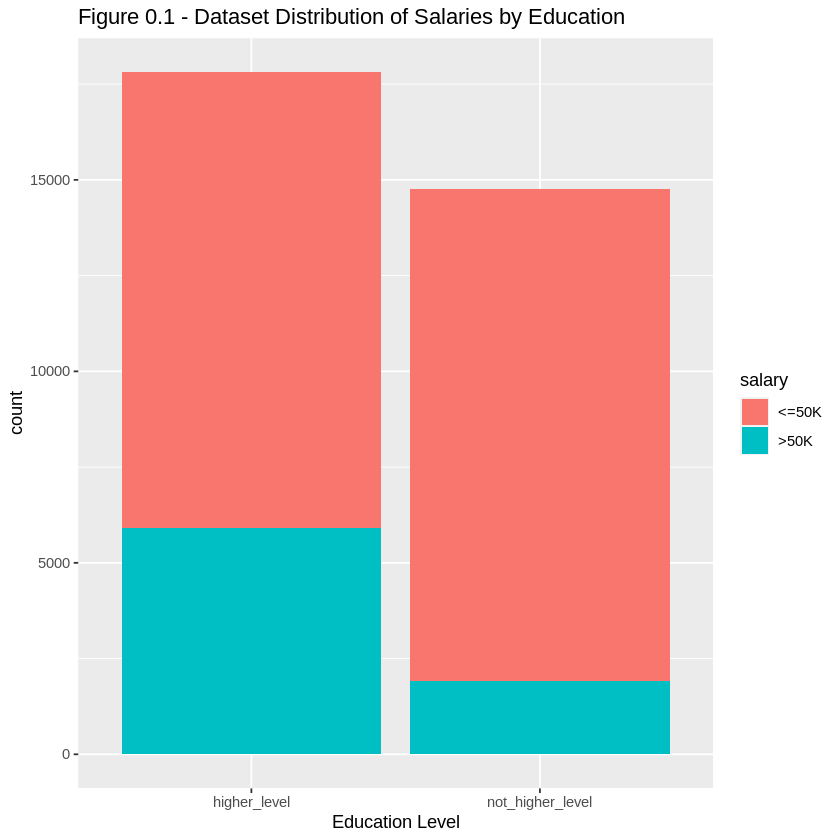

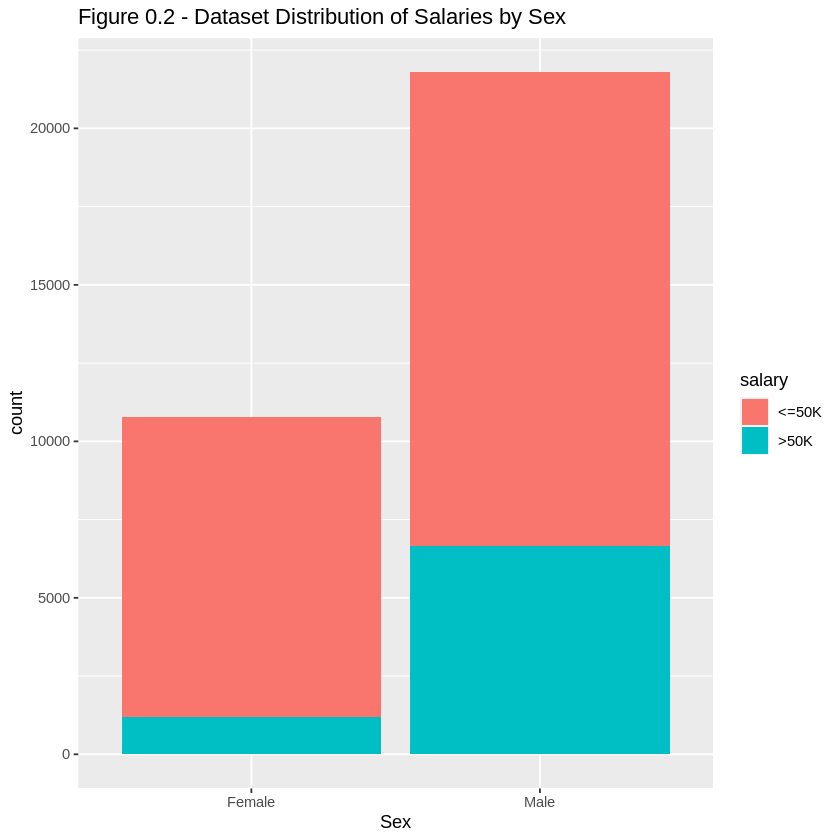

In [4]:
edu_plot <- adult_tidy |>
    ggplot(aes(x=education,fill=salary)) +
    geom_bar() +
    ggtitle("Figure 0.1 - Dataset Distribution of Salaries by Education") +
    xlab("Education Level")

sex_plot <- adult_tidy |>
    ggplot(aes(x=sex,fill=salary)) +
    geom_bar() +
    ggtitle("Figure 0.2 - Dataset Distribution of Salaries by Sex") +
    xlab("Sex")

edu_plot

sex_plot

From the visualization, we can see that from this sample there does appear to be a difference in proportion in both the distribution by education AND the distribution by sex. Soon, we will perform hypothesis testing to test if these results have statistical significance.

***

### 1 - Inference on Education v.s. Salary

For now, let us focus on our first question: 

**Is the proportion of working adults with higher education (i.e. bachelors, doctorate) and a salary greater than \\$50,000 noticeably greater than the proportion of working adults without higher education (i.e. high school) and a salary greater than \\$50,000?**

Firstly, let us represent the data we are working with in a simple manner:

In [5]:
edu_table <- adult_tidy |>
    group_by(education,salary) |>
    summarize(n=n())
edu_table

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,salary,n
<chr>,<chr>,<int>
higher_level,<=50K,11885
higher_level,>50K,5922
not_higher_level,<=50K,12835
not_higher_level,>50K,1919


The above table allows us to calculate the proportions we are interested in. Namely, the proportion of people with higher level education with >50K salary and the proportion of people without higher level education with >50K salary.

Now, let us compute the proportions using this data:

In [6]:
edu_prop_table <- tibble(n_higher_level = 5922+11885, 
                           p_higher_level = 5922/n_higher_level, 
                           n_not_higher_level = 1919+12835, 
                           p_not_higher_level = 1919/n_not_higher_level, 
                           diff_in_p = p_higher_level-p_not_higher_level)
edu_prop_table

n_higher_level,p_higher_level,n_not_higher_level,p_not_higher_level,diff_in_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17807,0.3325658,14754,0.1300664,0.2024994


Thus, the point estimate for the difference in proportion of adults with salaries greater than $50,000 between those with and without higher education is `0.2024994`.

#### Confidence Intervals for the True Difference in Proportions - Education v.s. Salary

##### 1) Confidence Interval Using Bootstrapping with the Infer Package

Before we construct our confidence interval, let us first ensure normality in our bootstrap distribution with 500 repetitions on our original sample. 

Note: For all our bootstrapping, we chose 500 repetitions as it is reasonably large, but increasing repetition count would potentially cause problems due to computational demand.

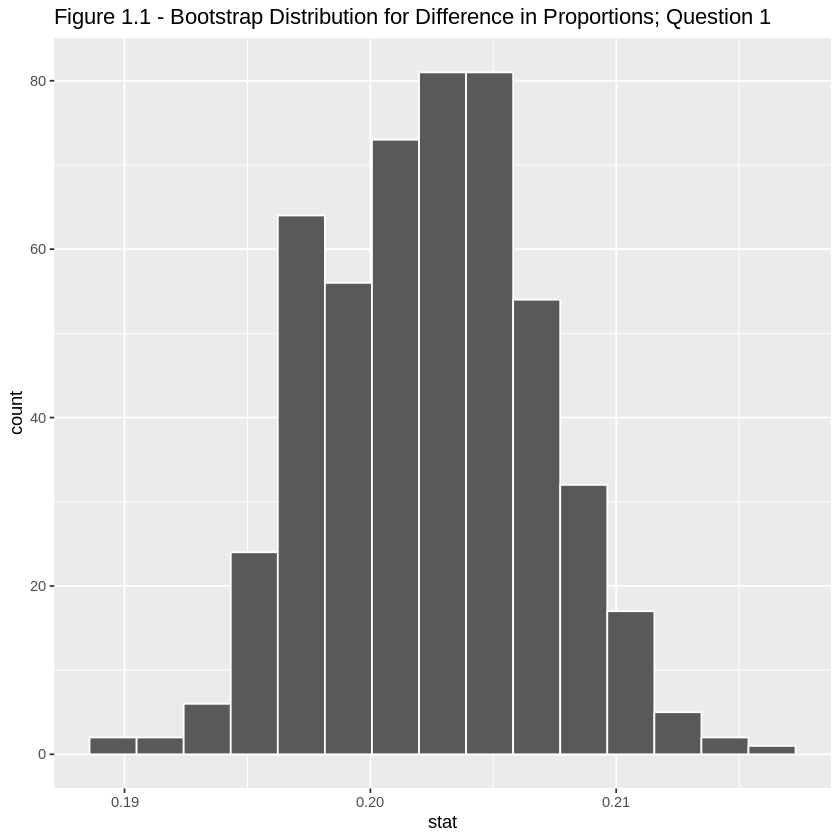

In [7]:
set.seed(1234) # Bootstrap sampling occurs in this cell, which contains random generations. 
# For the purpose of reproducibility, we set the seed of all cells containing random generation to 1234.

edu_boot_dist <- adult_tidy |>
    specify(response = salary, explanatory = education, success = ">50K") |>
    generate(type = "bootstrap", reps = 500) |> # 500 bootstrap samples of adult_tidy
    calculate(stat = "diff in props", order = c("higher_level", "not_higher_level")) # (higher_level - not_higher_level)

edu_boot_dist |> visualize() +
labs(title = "Figure 1.1 - Bootstrap Distribution for Difference in Proportions; Question 1")# visualizes bootstrap distribution

Through this visualization, the bootstrap distribution indeed appears approximately normal, and our next step is to generate our confidence interval:

In [8]:
edu_ci <- edu_boot_dist |>
    get_confidence_interval(level = 0.99, type = "percentile") # 99% Confidence Interval
edu_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1916937,0.2136582


Through our construction of a 99% confidence interval using bootstrapping with 500 bootstrap samples, we are 99% confident that the true difference in proportion with >50,000$ salary between those with higher level education and those without is captured in the interval [0.1916937, 0.2136582].

*(Note: At 1000 replicates, our interval was [0.1911318, 0.2137112]. Replicate number decreased due to some members having difficulty running.)*

##### 2) Confidence Interval Using Asymptotic Theory

When constructing a 2 Proportion Z-Interval using asymptotic theory, the following conditions must be met:

**1) Random: The data should be randomly sampled to avoid bias.**

    This condition is met, as the datapoints in the dataset were randomly selected from the US Census in 1994.
   
**2) Size: Both groups are large enough such that: $n_1p_1\geq10, n_1(1-p_1)\geq10, n_2p_2\geq10, n_2(1-p_2)\geq10$** 

(in other words, at least 10 successes and at least 10 failures have been observed in each)
    
    From inspecting "edu_table", we can see that this condition is clearly met.

**3) Independence: The sample should not exceed 10% of the population.**

    This condition is met, as 48842 data points is obviously less than 10% of the population of the US in 1994 (which was over 200 million)

With the conditions out of the way, we can go ahead and apply the formulae below to calculate the confidence interval. With the help of R and `qnorm`, we can calculate a 99% confidence interval, relying on asymptotic theory.

Formula 1:
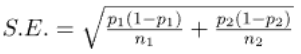

Formula 2:
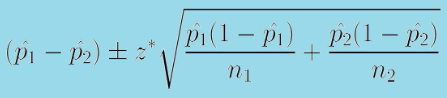

In [9]:
# Asympototics Method - 99% Confidence Interval for Difference in Proportions

n1 <- edu_prop_table$n_higher_level
n2 <- edu_prop_table$n_not_higher_level
p1 <- edu_prop_table$p_higher_level
p2 <- edu_prop_table$p_not_higher_level

# Confidence Interval formula: See pasted picture
conf_interval <- 
    tibble(p_diff = p1-p2,
           p_diff_std_error = sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2)), # SE formula for diff in props: See formula 1 above
           lower_ci = p_diff - qnorm(0.995) * p_diff_std_error, # CI formula for diff in props: See formula 2 above
           upper_ci = p_diff + qnorm(0.995) * p_diff_std_error  # CI formula for diff in props: See formula 2 above
          )
conf_interval

p_diff,p_diff_std_error,lower_ci,upper_ci
<dbl>,<dbl>,<dbl>,<dbl>
0.2024994,0.004487108,0.1909414,0.2140574


Through our construction of a 99% confidence interval using asymptotics, we are 99% confident that the true difference in proportion with >50,000$ salary between those with higher level education and those without is captured in the interval [0.1909414, 0.2140574].

#### Conclusion - Confidence Intervals on Education v.s. Salary

In our research, we use a 99% percent confidence interval, which means we are 99% confident that the true statistic is captured in our interval. We chose to set the confidence level at 99% because of a couple of reasons outlined below: 

Firstly, since our original sample was very large, we felt that the width of the interval would still be reasonable despite having a high confidence level. This is due to the inverse relationship between sample size and width of the confidence interval. Since our sample size is large, the confidence interval we obtained is still reasonably narrow despite the 99% confidence level. 

Secondly, as per common convention when creating confidence intervals and performing hypothesis tests, the confidence level is 1 minus the significance level. In the next section, where we perform hypothesis tests, we chose our significance level (alpha) to be 0.01 (or 1%), for reasons covered later.

Ultimately, our 99% confidence interval approximately captured values between 0.191 and 0.214 in both the bootstrapping approach and the asymptotic approach. Interpreting this further, we can be approximately 99% confident that the true difference in proportions between those with high level education with >\\$50,000 salary and those without high level education with >\\$50,000 is between 0.191 and 0.214.

***

#### Hypothesis Tests for the Difference in Proportions - Education v.s. Salary

Suppose `p1` is the proportion of those with higher level education with >50k salary, and `p2` is the proportion of those without higher level education with >50k salary.

To answer our [first question](#Introduction), we would set our null and alternative hypotheses as follows:

$H_0$: `p1 - p2 = 0`

$H_A$: `p1 - p2 > 0`

##### 1) Hypothesis Test Using Bootstrapping with the Infer Package

In [10]:
# The observed diff in props is calculated using the original tidied sample, with salary as response variable and education as explanatory variable. 
# This is found to be 0.2024994
obs_diff_prop_edu <- adult_tidy |>
    specify(response = salary, explanatory = education, success = ">50K") |>
    calculate(stat = "diff in props", order = c("higher_level", "not_higher_level"))

obs_diff_prop_edu

stat
<dbl>
0.2024994


In [11]:
# 500 Samples are generated from the null distribution.
# The difference in proportion of those with higher education and salary over 50K is compared to the proportion of those without higher education and salary over 50K. 
# These reuslts are plotted with an additional bar indicating the observed difference in proportion. 

set.seed(1234) # Bootstrap sampling occurs in this cell, which contains random generations. 
# For the purpose of reproducibility, we set the seed of all cells containing random generation to 1234.

salary_null_distribution <- adult_tidy |>
    specify(response = salary, explanatory = education, success = ">50K") |>
    hypothesize(null = "independence") |>
    generate(reps = 500, type = "permute") |>
    calculate(stat = "diff in props", order = c("higher_level", "not_higher_level"))

head(salary_null_distribution)

replicate,stat
<int>,<dbl>
1,-0.001003359
2,0.002714718
3,-0.003977821
4,-0.001870911
5,-0.002118782
6,-0.008687386


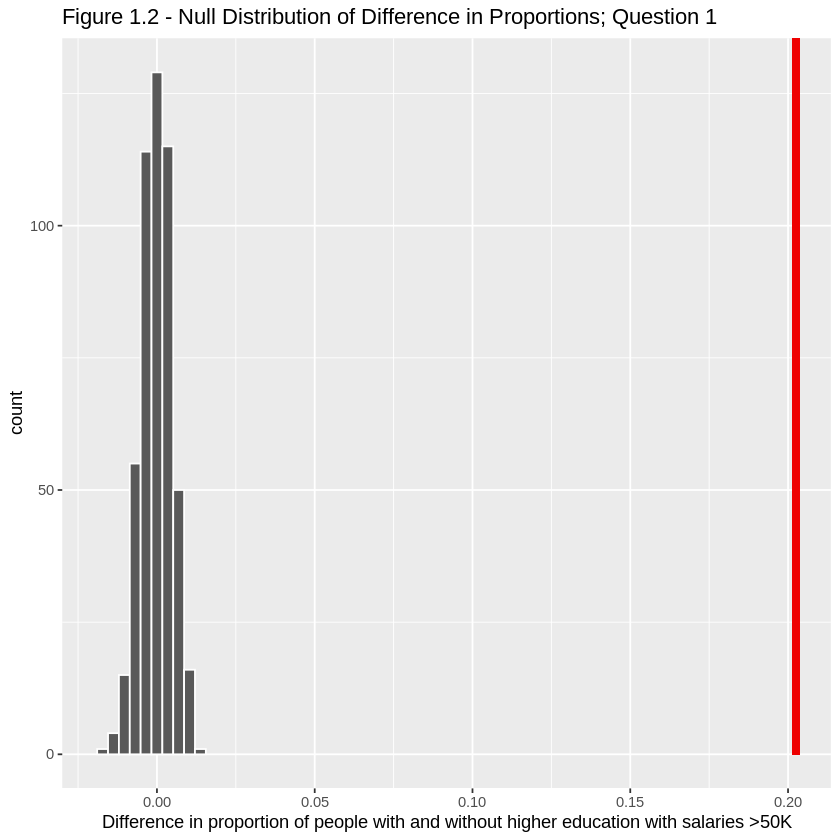

In [12]:
adult_salary_plot <- salary_null_distribution |>
    visualize(bins = 10) + 
    shade_p_value(obs_stat = obs_diff_prop_edu, direction = "right") +
    labs(x = "Difference in proportion of people with and without higher education with salaries >50K", 
         title = "Figure 1.2 - Null Distribution of Difference in Proportions; Question 1")

adult_salary_plot

In [13]:
# Using get_p_value and the null distribution, the p-value is obtained and found to be extremely near 0. 

#Since our alternative hypothesis is that p1 - p2 > 0, we set direction="right".
p_value <- salary_null_distribution |>
    get_p_value(obs_stat = obs_diff_prop_edu, direction = "right")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


##### 2) Hypothesis Test Using Asymptotic Theory

In [14]:
n1 <- edu_prop_table$n_higher_level
n2 <- edu_prop_table$n_not_higher_level
p1 <- edu_prop_table$p_higher_level
p2 <- edu_prop_table$p_not_higher_level

phat <- (n1*p1 + n2*p2) / (n1 + n2)

z_score <- (p1 - p2) / sqrt(phat*(1-phat)*(1/n1 + 1/n2))
z_score # 42.5415162036526 - Approximately 42.5 SDs away from mean. 

# Since our alternative hypothesis is that p1 - p2 > 0, we set lower.tail=FALSE
p_value <- pnorm(z_score, lower.tail=FALSE)
p_value # 0 - Value is extremely small, near 0. Reasonable due to our large z-score.

# Using prop.test to confirm our p_value of 0.
tidy(prop.test(x = c(5922,1919), # an array with the number of successes in each sample
               n = c(17807,14754), # an array with the size of each sample
               alternative = "greater"))

[1] 42.54152

[1] 0

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.3325658,0.1300664,1808.673,0,1,0.1950568,1,2-sample test for equality of proportions with continuity correction,greater


#### Conclusion - Hypothesis Tests on Education v.s. Salary

Recall that our null hypothesis states that there is no difference in the proportion of working adults with higher education and a salary greater than \\$50,000 compared to the proportion of working adults without higher education and a salary greater than \\$50,000.

In our research, we set the significance level (alpha value) to 0.01 (or 1%). This means that if the p-value obtained from our hypothesis tests are less than 0.01, we will reject the null hypothesis. In both our bootstrap hypothesis test and our asymptotic hypothesis test, we obtained values of near 0, which are less than our significance value of 0.01. Thus, we reject the null hypothesis. If the $H_0$ was true, there would be a nearly 0% chance to obtain the data in our sample through statistical variation.  

We set our significance level to 0.01 because in this situation, we have a very large sample size, and would like to avoid the potential consequences of reporting a false positive. Although this will increase the amount of evidence needed to report a statistically significant result, decreasing the risk of reporting that there is a difference in proportion when there may not be (i.e. type I error) from 5% to 1% justifies this selection of alpha. Additionally, given our large sample size, we know that the probability of both type I and type II errors will be smaller.

It is also noteworthy to mention that our extremely low p-value is justifiable by the fact that our z-score is approximately 42.5. That is 42.5 standard deviations away from the mean, thus the odds of a obtaining value greater than 42.5 standard deviations away is obviously going to be extremely low. The bootstrap visualization in figure 1.2 is a helpful visualization for just how far away our observed sample statistic is from the null distribution.

In our discussion section later on, we will touch on the implications of our findings in further detail.

***

### 2 - Inference on Sex v.s. Salary

Let us move on to our second question: 

**Is the proportion of working male adults with a salary greater than \\$50,000 noticeably greater than the proportion of working female with a salary greater than \\$50,000?**

We will be performing the same tests as in our first question, only with the explanatory variable being `sex` instead of `education`.

First, let us organize the data into a better format, grabbing the counts of people in each sex with salaries > or <=50K.

In [15]:
sex_table <- adult_tidy |>
    group_by(sex,salary) |>
    summarize(n=n())

sex_table

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,salary,n
<chr>,<chr>,<int>
Female,<=50K,9592
Female,>50K,1179
Male,<=50K,15128
Male,>50K,6662


Using that data, we can compute the proportions of males and females with >50K salary.

In [16]:
sex_prop_table <- tibble(n_male = 6662+15128, 
                           p_male = 6662/n_male, 
                           n_female = 1179+9592, 
                           p_female = 1179/n_female, 
                           diff_in_p = p_male-p_female)
sex_prop_table

n_male,p_male,n_female,p_female,diff_in_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21790,0.3057366,10771,0.1094606,0.196276


This gives us the point estimate for the difference in proportions of males and females with salaries >50K which comes out to `0.196276`. 

#### Confidence Intervals for the True Difference in Proportions - Sex v.s. Salary

##### 1) Confidence Interval Using Bootstrapping with the Infer Package

Before we construct our confidence interval, let us first ensure normality in our bootstrap distribution with 500 repetitions on our original sample. 

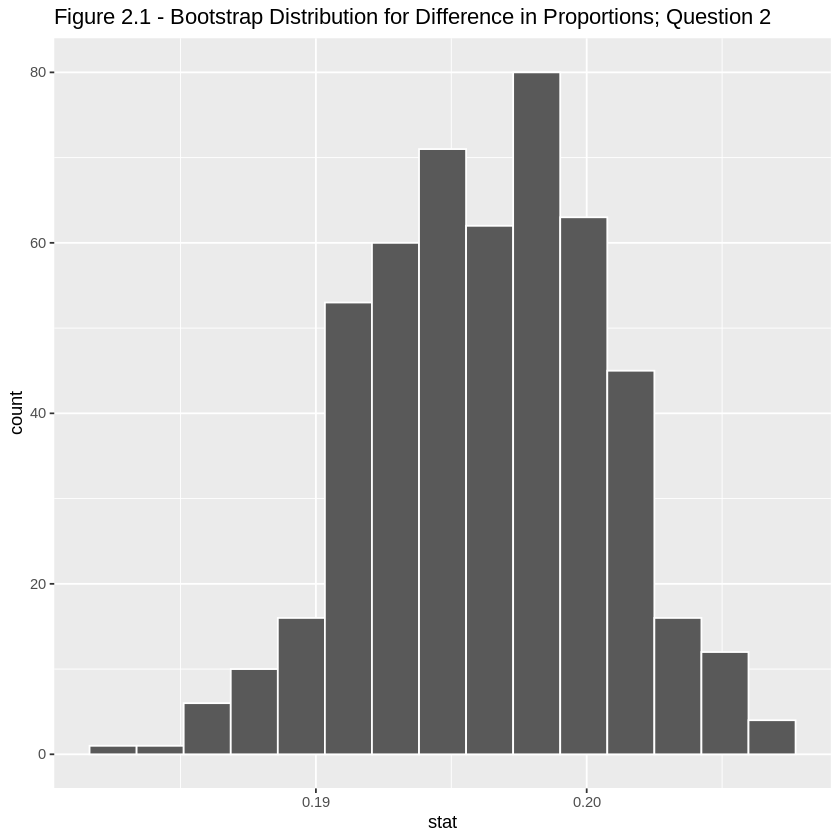

In [17]:
set.seed(1234) # Bootstrap sampling occurs in this cell, which contains random generations. 
# For the purpose of reproducibility, we set the seed of all cells containing random generation to 1234.

sex_boot_dist <- adult_tidy |>
    specify(response = salary, explanatory = sex, success = ">50K") |>
    generate(type = "bootstrap", reps = 500) |> # 500 bootstrap samples of adult_tidy
    calculate(stat = "diff in props", order = c("Male", "Female")) # (higher_level - not_higher_level)

sex_boot_dist |> visualize() +
labs(title = "Figure 2.1 - Bootstrap Distribution for Difference in Proportions; Question 2") # visualizes bootstrap distribution

Through this visualization, the bootstrap distribution indeed appears approximately normal, and our next step is to generate our confidence interval:

In [18]:
sex_ci <- sex_boot_dist |>
    get_confidence_interval(level = 0.99, type = "percentile") # 99% Confidence Interval
sex_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1854019,0.2060574


Through our construction of a 99% confidence interval using bootstrapping over 500 bootstrap samples, we are 99% confident that the true difference in proportion with >50,000$ salary between males and females is captured in the interval [0.1854019, 0.2060574].

*(Note: At 1000 replicates, we got the interval [0.1851178, 0.2070455]. Replicate number decreased due to some members having difficulty running.)*

##### 2) Confidence Interval Using Asymptotic Theory

Recall from our inference on question 1 - When constructing a 2 Proportion Z-Interval using asymptotic theory, the following conditions must be met:

**1) Random: The data should be randomly sampled to avoid bias.**

    This condition is met, as the datapoints in the dataset were randomly selected from the US Census in 1994.
   
**2) Size: Both groups are large enough such that: $n_1p_1\geq10, n_1(1-p_1)\geq10, n_2p_2\geq10, n_2(1-p_2)\geq10$** 

(in other words, at least 10 successes and at least 10 failures have been observed in each)
    
    From inspecting "sex_table", we can see that this condition is clearly met.

**3) Independence: The sample should not exceed 10% of the population.**

    This condition is met, as 48842 data points is obviously less than 10% of the population of the US in 1994 (which was over 200 million)

With the conditions out of the way, we can go ahead and apply the formulae below to calculate the confidence interval. With the help of R and `qnorm`, we can calculate a 99% confidence interval, relying on asymptotic theory.

Formula 1:
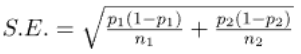

Formula 2:
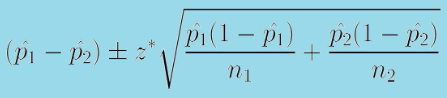

In [19]:
# Asympototics Method - 99% Confidence Interval for Difference in Proportions

n1 <- sex_prop_table$n_male
n2 <- sex_prop_table$n_female
p1 <- sex_prop_table$p_male
p2 <- sex_prop_table$p_female

# Confidence Interval formula: See pasted picture
conf_interval <- 
    tibble(p_diff = p1-p2,
           p_diff_std_error = sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2)), # SE formula for diff in props: See formula 1 above
           lower_ci = p_diff - qnorm(0.995) * p_diff_std_error, # CI formula for diff in props: See formula 2 above
           upper_ci = p_diff + qnorm(0.995) * p_diff_std_error  # CI formula for diff in props: See formula 2 above
          )
conf_interval

p_diff,p_diff_std_error,lower_ci,upper_ci
<dbl>,<dbl>,<dbl>,<dbl>
0.196276,0.004334902,0.18511,0.207442


Through our construction of a 99% confidence interval using asymptotics, we are 99% confident that the true difference in proportion with >50,000$ salary between those with higher level education and those without is captured in the interval [0.18511, 0.207442].

#### Conclusion - Confidence Intervals on Sex v.s. Salary

In conclusion, we made many similar decisions to our confidence intervals on education v.s. salary, which we made to help answer question 1. This can be found [here](#Conclusion---Confidence-Intervals-on-Education-v.s.-Salary). 

Ultimately, our 99% confidence interval approximately captured values between 0.185 and 0.207 in both the bootstrapping approach and the asymptotic approach. Interpreting this further, we can be approximately 99% confident that the true difference in proportions between males with >\\$50,000 salary and females with >\\$50,000 is between 0.185 and 0.207.

***

#### Hypothesis Tests for the Difference in Proportions - Sex v.s. Salary

Suppose `p1` is the proportion of males with >50k salary, and `p2` is the proportion of females with >50k salary.

To answer our [second question](#Introduction), we would set our null and alternative hypotheses as follows:

$H_0$: `p1 - p2 = 0`

$H_A$: `p1 - p2 > 0`

##### 1) Hypothesis Test Using Bootstrapping with the Infer Package

In [20]:
# The observed difference in proportions is calculated using the original tidied sample, with salary as a response variable and sex as the explanatory variable. 
# This is found to be 0.196276 
obs_diff_prop_sex <- adult_tidy |>
    specify(response = salary, explanatory = sex, success = ">50K") |>
    calculate(stat = "diff in props", order = c("Male", "Female"))

obs_diff_prop_sex

stat
<dbl>
0.196276


In [21]:
# 500 Samples are generated from the null distribution.
# The difference in proportion of males with salary over 50K is compared to the proportion of females with salary over 50K. 
# These reuslts are plotted with an additional bar indicating the observed difference in proportion. 

set.seed(1234) # Bootstrap sampling occurs in this cell, which contains random generations. 
# For the purpose of reproducibility, we set the seed of all cells containing random generation to 1234.

sex_null_distribution <- adult_tidy |>
    specify(response = salary, explanatory = sex, success = ">50K") |>
    hypothesize(null = "independence") |>
    generate(reps = 500, type = "permute") |>
    calculate(stat = "diff in props", order = c("Male","Female"))

head(salary_null_distribution)

replicate,stat
<int>,<dbl>
1,-0.001003359
2,0.002714718
3,-0.003977821
4,-0.001870911
5,-0.002118782
6,-0.008687386


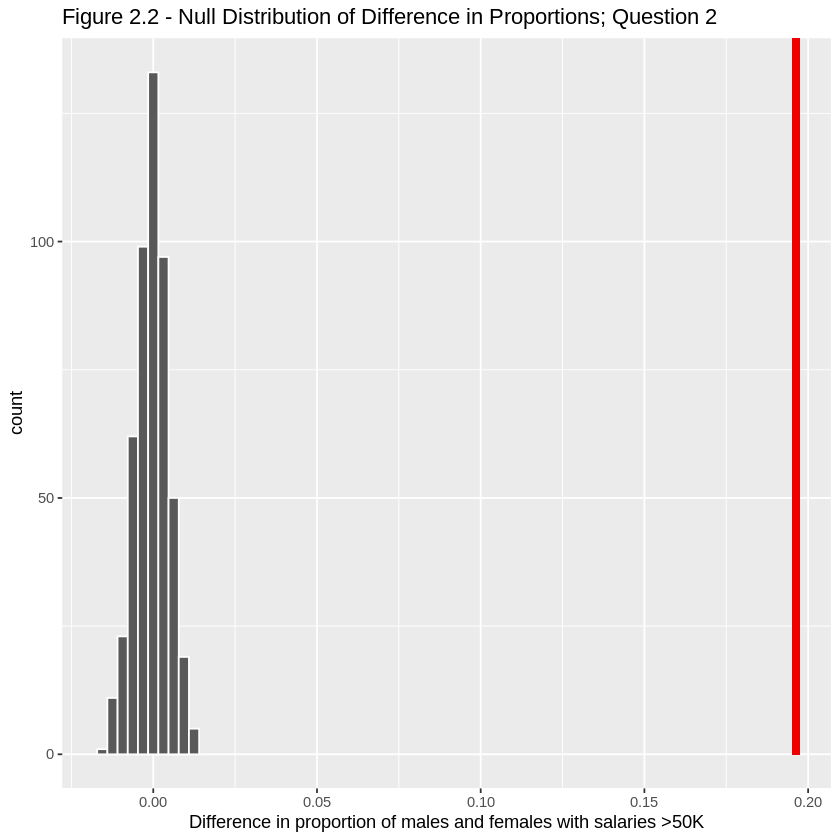

In [22]:
sex_salary_plot <- sex_null_distribution |>
    visualize(bins = 10) + 
    shade_p_value(obs_stat = obs_diff_prop_sex, direction = "right") +
    labs(x = "Difference in proportion of males and females with salaries >50K", 
         title = "Figure 2.2 - Null Distribution of Difference in Proportions; Question 2")

sex_salary_plot

In [23]:
# Using get_p_value and the null distribution, the p-value is obtained and found to be 0. 

#Since our alternative hypothesis is that p1 - p2 > 0, we set direction="right".
p_value <- sex_null_distribution |>
    get_p_value(obs_stat = obs_diff_prop_sex, direction = "right")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


##### 2) Hypothesis Test Using Asymptotic Theory

In [24]:
n1 <- sex_prop_table$n_male
n2 <- sex_prop_table$n_female
p1 <- sex_prop_table$p_male
p2 <- sex_prop_table$p_female

phat <- (n1*p1 + n2*p2) / (n1 + n2)

z_score <- (p1 - p2) / sqrt(phat*(1-phat)*(1/n1 + 1/n2))
z_score # 38.9728985316344 - Approximately 39 SDs away from mean. 

# Since our alternative hypothesis is that p1 - p2 > 0, we set lower.tail=FALSE
p_value <- pnorm(z_score, lower.tail=FALSE)
p_value # 0 - Value is extremely small, near 0. Reasonable due to our large z-score.

# Using prop.test to confirm our p_value of 0.
tidy(prop.test(x = c(5922,1919), # an array with the number of successes in each sample
               n = c(17807,14754), # an array with the size of each sample
               alternative = "greater"))

[1] 38.9729

[1] 0

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.3325658,0.1300664,1808.673,0,1,0.1950568,1,2-sample test for equality of proportions with continuity correction,greater


#### Conclusion - Hypothesis Tests on Sex v.s. Salary

Recall that our null hypothesis states that there is no difference in the proportion of working male adults with a salary greater than \\$50,000 compared to the proportion of working female adults with a salary greater than \\$50,000.

Like our hypothesis tests in question 1, we set the significance level (alpha value) to 0.01 (or 1%), meaning if the p-value obtained from our hypothesis tests are less than 0.01, we will reject the null hypothesis. In both our bootstrap hypothesis test and our asymptotic hypothesis test, we obtained values of near 0, which are less than our significance value of 0.01. Thus, we will reject the null hypothesis. If the $H_0$ was true, there would be a nearly 0% chance to obtain the data in our sample through statistical variation. 

Again, our extremely low p-value is justifiable by the fact that our z-score is approximately 39. That is 39 standard deviations away from the mean, thus the odds of a obtaining value greater than 39 standard deviations away is obviously going to be extremely low. The bootstrap visualization in figure 2.2 is a helpful visualization for just how far away our observed sample statistic is from the null distribution.

(Reasons for selecting our alpha are the same as question 1)

In the next section (discussion), we will touch on the implications of all our findings in further detail.

***

## Summary & Discussion

##### 1) Bootstrapping v.s. Asymptotics

We believe that in this situation, neither bootstrapping nor asymptotics is noticeably more appropriate than the other for the purpose of accuracy. Both methods returned extremely similar results in both questions.

Usually, the advantage to bootstrapping is that it would be more precise when working with a smaller sample size, with its biggest disadvantage in our case being the fact that it is computationally demanding when dealing with large samples. When we tried running with a replicate count of 1000, the kernel died due to high computational resource consumption, caused by many replicates on our already large sample. For asymptotics, the biggest disadvantage is that it requires a large enough sample size for normal approximation, and it does not work well in small samples or heavily skewed samples. However, in our case, these disadvantages are a moot point.

Thus, in our specific situation, both techniques were reasonable to use and both yielded very similar results. **However**, we believe asymptotics is more effective since we meet all of the conditions, and bootstrapping is just too computationally demanding with our large sample size. (it also takes longer for the computer to run)

##### 2) Expectations v.s. Reality

In the proposal, we expected to find that the proportion of working adults with higher education and a salary greater than \\$50,000 **will be noticeably greater** than the proportion of working adults without higher education and a salary greater than \\$50,000. Additionally, with our addition of our second question, we expected to find that the proportion of working male adults with a salary greater than \\$50,000 to be **relatively greater** than the proportion of working female adults with a salary of \\$50,000.

After conducting our hypothesis tests and confidence intervals, we can conclude that our initial expectations were correct for the most part. 

The difference in proportion of people with salary >\\$50,000 in those with higher education versus those without higher education is indeed very large, as we are 99% confident the true difference in proportion is approximately in the interval [0.191, 0.214]. Additionally, with our near-zero p-value, we can be sure that our significant findings are not a result of random statistical variation. 

As for the difference in proportion of male adults with a salary >\\$50,000 versus female adults with a salary >\\$50,000, our findings were even more significant than we anticipated. The difference is large, as we are 99% confident the true difference in proportion is approximately in the interval [0.185, 0.207]. We can also be sure that our significant findings are not a result of random statistical variation due to our near-zero p-value.

##### 3) What impact do our findings make?

Our findings regarding education and salary could allow families and students to make a more informed decision about their academics. By looking at the difference in proportion of adults with salaries greater than \\$50,000 between those with and without higher education, individuals can better assess the value of and whether it’s in their best interest to pursue further education.

Additionally, our findings regarding sex and salary could help with our understanding of American society in 1994, by addressing questions such as wage gap between genders. By pairing our research with another inferential study on modern American wages, we can see if there seems to be a positive, negative, or no trend regarding the impact of education or gender on wages.  

##### 4) What additional questions does our study lead to?

As we mentioned in our proposal, the results of this investigation could lead to the questions related to how higher education affects job performance, and whether or not higher education should be made more accessible to more of the population.

However, with the addition of our inference on sex and salary, we believe additional questions can be asked regarding whether or not there is a correlation between education and sex. For example, could our findings regarding sex and salary be influenced by the third variable problem, with the third variable potentially being that the proportion of males with higher level education is larger than that of females in 1994?   

***

## References

Becker, B., & Kohavi, R. (1996, April 30). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20

Ma, J., Pender, M., &amp; Welch, M. (2015, November 30). Education pays 2016: The benefits of higher education for individuals and society. trends in higher education series. College Board. https://eric.ed.gov/?id=ED572548 

Park, Y., Galassi, G., & Kyui, N. (2020, October 7). Learning and earning. Bank of Canada. https://www.bankofcanada.ca/2020/10/learning-and-earning/#:~:text=In%20both%201997%20and%202015,those%20with%20no%20higher%20education

Smith, T. W., Hout, M., &amp; Marsden, P. V. (2013, September 11). General Social Survey, 1972-2012 [cumulative file]. General Social Survey, 1972-2012 [Cumulative File]. https://www.icpsr.umich.edu/web/ICPSR/studies/34802/versions/V1  